In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly
# import plotly.figure_factory as ff

In [2]:
dataset = np.loadtxt('upd-combined-education-vaccine-set-final.csv', delimiter=',')
X = dataset[:,2:85]
Y = dataset[:,1]
print(X)
# label_encoded_y = LabelEncoder().fit_transform(Y)

[[1.99817925e+01 3.62767410e+01 3.12243977e+01 ... 4.27651644e-01
  5.56082684e-01 1.56895967e-01]
 [2.32142849e+01 4.09529877e+01 2.56559772e+01 ... 3.70919547e-01
  5.36223713e-01 1.59835372e-01]
 [2.18780251e+01 3.95934181e+01 3.00096798e+01 ... 2.03849951e-01
  4.36327739e-01 3.92892399e-01]
 ...
 [1.16260586e+01 1.40963240e+01 2.18774681e+01 ... 7.66139032e-01
  2.69182400e-01 4.27524160e-02]
 [1.04094038e+01 1.48576975e+01 2.37526531e+01 ... 7.87813240e-01
  2.75305796e-01 4.15520510e-02]
 [1.11691022e+00 7.26513577e+00 1.40605431e+01 ... 9.22352775e-01
  1.55011325e-01 2.65430350e-02]]


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33)

model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# n_estimators = range(50, 400, 50)
# max_depth = range(1, 11, 2)
# print(max_depth)
# param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
# grid_result = grid_search.fit(X, label_encoded_y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# 	print("%f (%f) with: %r" % (mean, stdev, param))
# # plot results
# scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
# for i, value in enumerate(max_depth):
#     pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
# pyplot.legend()
# pyplot.xlabel('n_estimators')
# pyplot.ylabel('Log Loss')
# pyplot.savefig('n_estimators_vs_max_depth.png')
#n_estimators=1000, max_depth=9, eta=0.1, subsample=0.7, colsample_bytree=0.8

In [14]:
model.fit(xtrain, ytrain)
print(model.feature_importances_)
xgb.plot_tree(model)
fig, ax = plt.subplots(1,1,figsize=(10, 20))
xgb.plot_importance(model, ax=ax)
plt.show()
score = model.score(xtrain, ytrain)
print("Training score: ", score)

[0.01022901 0.00643667 0.00524019 0.01317455 0.00724399 0.01055549
 0.01153409 0.005438   0.00187593 0.01696756 0.01250472 0.01013193
 0.01061489 0.00499255 0.00410442 0.00344658 0.00692898 0.00542482
 0.00385171 0.00811838 0.00641469 0.00482637 0.01875392 0.00742826
 0.01442868 0.00738712 0.00752738 0.00822954 0.00553692 0.00516215
 0.01027166 0.01517288 0.02772488 0.00505993 0.01818527 0.03892682
 0.01081917 0.02425753 0.01072591 0.01030505 0.0046245  0.00989787
 0.02861143 0.00545047 0.01059683 0.13728756 0.07417521 0.02512273
 0.01293124 0.02546391 0.00978496 0.00610231 0.00403664 0.00972519
 0.00481212 0.00453858 0.00811511 0.00355973 0.00568107 0.00604468
 0.00486307 0.00638308 0.00632007 0.00362085 0.00553606 0.01116798
 0.00719155 0.00543203 0.00579929 0.00331207 0.00453359 0.00760162
 0.00486482 0.00655857 0.00648797 0.00698487 0.00827943 0.00859885
 0.00836778 0.01896124 0.01379634 0.01220426 0.02061389]


TypeError: plot_tree() missing 1 required positional argument: 'booster'

In [5]:
scores = cross_val_score(model, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())


Mean cross-validation score: 0.56


In [6]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, xtrain, ytrain, cv=kfold)
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


K-fold CV average score: 0.55


In [7]:
ypred = model.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.01
RMSE: 0.08


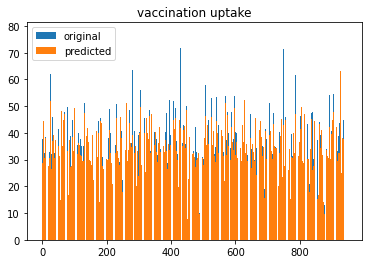

In [8]:
x_ax = range(len(ytest))
plt.bar(x_ax, (ytest*100), label="original")
plt.bar(x_ax, (ypred*100), label="predicted")
plt.title("vaccination uptake")
plt.legend()
plt.show()

In [9]:
ypred = model.predict(X)
mse = mean_squared_error(Y, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
kf_cv_scores = cross_val_score(model, X, Y, cv=kfold)
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

MSE: 0.00
RMSE: 0.05
K-fold CV average score: 0.58


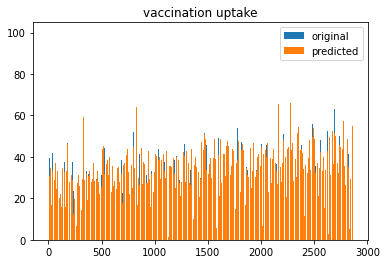

In [10]:
x_ax = range(len(Y))
plt.bar(x_ax, (Y*100), label="original")
plt.bar(x_ax, (ypred*100), label="predicted")
plt.title("vaccination uptake")
plt.legend()
plt.show()